<a href="https://colab.research.google.com/github/ShafinMz08/Semiconductor-manufacturing-process/blob/main/SYPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: Semiconductor Manufacturing Process

## Overview

### **Domain**: Semiconductor Manufacturing Process  
This project focuses on analyzing sensor data collected during a complex semiconductor manufacturing process. The goal is to predict the Pass/Fail yield of production entities while identifying the most relevant signals (features) contributing to the process outcome. Feature selection and data preprocessing play a critical role in reducing noise, improving model accuracy, and optimizing manufacturing efficiency.

---

### **Project Objectives**
1. Build a classifier to predict whether a production entity will pass or fail based on sensor data.
2. Analyze and determine whether all features are required for the model or if feature selection can improve performance.
3. Apply preprocessing techniques such as missing value imputation, feature scaling, and target balancing to prepare the dataset for machine learning.

---

### **Dataset Description**
- **File**: `signal-data.csv`  
- **Size**: 1567 rows and 592 columns (591 features + 1 target variable)  
- **Details**:
  - Each row represents a production entity.
  - Each column corresponds to a signal or measurement point.
  - The target variable (`Pass/Fail`):
    - `-1`: Pass
    - `1`: Fail
  - Includes a timestamp column (`Time`) for temporal analysis.

## Data Import and Exploration
- **Objective**: Load the dataset and understand its structure.
- **Actions**:
  - Loaded the dataset `signal-data.csv`.
  - Checked for missing values and identified columns with high missing percentages (>50%).
- **Outcome**:
  - Dropped columns with excessive missing values to simplify preprocessing.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving signal-data.csv to signal-data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('signal-data.csv')


## Data Cleansing
- **Objective**: Handle missing values and remove unnecessary data.
- **Actions**:
  - Dropped columns with >50% missing values.
  - Imputed missing values:
    - Numerical columns: Replaced missing values with the mean.
    - Categorical columns: Replaced missing values with the mode.
  - Verified that no missing values remained.
- **Outcome**:
  - Cleaned dataset is ready for further analysis.


In [ ]:
# Check for the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Identify columns with high missing values (e.g., >50% missing)
high_missing_cols = missing_percentage[missing_percentage > 50].index.tolist()

# Summarize columns with high missing values
high_missing_summary = {
    "total_high_missing_cols": len(high_missing_cols),
    "high_missing_cols": high_missing_cols
}

# Display the top 10 columns with the highest missing values percentage
top_missing_cols = missing_percentage.sort_values(ascending=False).head(10)

high_missing_summary, top_missing_cols


({'total_high_missing_cols': 28,
  'high_missing_cols': ['72',
   '73',
   '85',
   '109',
   '110',
   '111',
   '157',
   '158',
   '220',
   '244',
   '245',
   '246',
   '292',
   '293',
   '345',
   '346',
   '358',
   '382',
   '383',
   '384',
   '492',
   '516',
   '517',
   '518',
   '578',
   '579',
   '580',
   '581']},
 158    91.193363
 292    91.193363
 293    91.193363
 157    91.193363
 85     85.577537
 492    85.577537
 220    85.577537
 358    85.577537
 517    64.964901
 245    64.964901
 dtype: float64)

In [ ]:
# Drop columns with >50% missing values
data_cleaned = data.drop(columns=high_missing_cols)

# Confirm the new shape of the dataset
print(f"New dataset shape after dropping columns: {data_cleaned.shape}")



New dataset shape after dropping columns: (1567, 564)


In [ ]:
# Impute numerical columns with the mean
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].mean())

# Impute categorical columns (if any) with the mode
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].fillna(data_cleaned[categorical_cols].mode().iloc[0])



In [ ]:
# Check for any remaining missing values
print(f"Remaining missing values: {data_cleaned.isnull().sum().sum()}")


Remaining missing values: 0


### Data Cleansing: Removing Duplicate Records
- **Objective**: Ensure the dataset does not contain redundant information.
- **Actions**:
  - Checked for duplicate rows in the dataset.
  - Identified the number of duplicate records.
  - Removed duplicate rows to maintain data integrity.
- **Outcome**:
  - The dataset is free of duplicate records, ensuring accuracy in analysis.


In [ ]:
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate records: {duplicate_count}")


Number of duplicate records: 0


In [ ]:
print(data.dtypes)  # Look for 'datetime64[ns]' or similar data types


Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object


In [ ]:
print(data.columns)


Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)


## Feature Engineering: Time-Based Features
- **Objective**: Extract meaningful information from the `Time` column to provide additional insights for analysis.
- **Actions**:
  - Converted the `Time` column to datetime format.
  - Created new features:
    - **Day of the Week**: Captures weekly patterns.
    - **Hour**: Captures daily trends.
    - **Elapsed Time**: Measures relative time from the earliest timestamp.
- **Outcome**:
  - The dataset now includes additional temporal features, which may improve the model's ability to capture trends.


In [ ]:
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')


In [ ]:
new_columns = pd.DataFrame({
    'day_of_week': data['Time'].dt.day_name()
})
data = pd.concat([data, new_columns], axis=1)


In [ ]:
data = data.copy()
data['day_of_week'] = data['Time'].dt.day_name()


In [ ]:
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
data['day_of_week'] = data['Time'].dt.day_name()


In [ ]:
data.to_csv('processed_data.csv', index=False)


In [ ]:
data['hour'] = data['Time'].dt.hour


In [ ]:
# Check for duplicate records
duplicates = data.duplicated()

# Count the number of duplicates
print(f"Number of duplicate rows: {duplicates.sum()}")

# Preview the duplicate rows, if any
print(data[duplicates])


Number of duplicate rows: 0
Empty DataFrame
Columns: [Time, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, ...]
Index: []

[0 rows x 594 columns]


In [ ]:
data['elapsed_time'] = (data['Time'] - data['Time'].min()).dt.total_seconds()


In [ ]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,584,585,586,587,588,589,Pass/Fail,day_of_week,hour,elapsed_time
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,Saturday,11,16710780.0
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,Saturday,12,16713000.0
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,Saturday,13,16715700.0
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,Saturday,14,16720860.0
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,Saturday,15,16723200.0


## Target Variable Exploration
- **Objective**: Understand the distribution of the `Pass/Fail` target variable and balance it.
- **Actions**:
  - Analyzed the percentage distribution of `Pass` and `Fail`.
  - Applied SMOTE to balance the target classes.
- **Outcome**:
  - The dataset is balanced and ready for train-test splitting.


In [ ]:
# Explore the target variable 'Pass/Fail'
target_balance = data_cleaned['Pass/Fail'].value_counts(normalize=True) * 100

# Display the distribution of the target variable
target_distribution = data_cleaned['Pass/Fail'].value_counts()

target_balance, target_distribution


(Pass/Fail
 -1    93.363114
  1     6.636886
 Name: proportion, dtype: float64,
 Pass/Fail
 -1    1463
  1     104
 Name: count, dtype: int64)

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate predictors and target
X = data_cleaned.drop(columns=['Pass/Fail', 'Time'], errors='ignore')
y = data_cleaned['Pass/Fail']

# Apply SMOTE for balancing the target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new target distribution after balancing
balanced_target_distribution = y_resampled.value_counts()

X_resampled.shape, balanced_target_distribution


((2926, 562),
 Pass/Fail
 -1    1463
  1    1463
 Name: count, dtype: int64)

In [ ]:
# Separate predictors (X) and target (y)
X = data_cleaned.drop(columns=['Pass/Fail', 'Time'], errors='ignore')  # Remove target and non-relevant columns
y = data_cleaned['Pass/Fail']

# Confirm the shapes of X and y
print(f"Predictors shape: {X.shape}")
print(f"Target shape: {y.shape}")


Predictors shape: (1567, 562)
Target shape: (1567,)


## Train-Test Split and Scaling
- **Objective**: Prepare the data for machine learning by splitting and scaling.
- **Actions**:
  - Performed an 80-20 stratified train-test split.
  - Standardized features using `StandardScaler` to ensure uniform scaling.
- **Outcome**:
  - Training and testing datasets are prepared with scaled features.


In [ ]:
from sklearn.model_selection import train_test_split

# Perform train-test split on the balanced data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Confirm the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2340, 562)
X_test shape: (586, 562)
y_train shape: (2340,)
y_test shape: (586,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)


## Data Preprocessing: Normalization of Numerical Features
- **Objective**: Scale numerical features to ensure all features have comparable ranges.
- **Actions**:
  - Applied Min-Max Scaling to normalize numerical columns between 0 and 1.
  - Ensured that all features contribute equally to model training.
- **Outcome**:
  - The scaled dataset is ready for model training, improving the stability and performance of algorithms.


In [ ]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [ ]:
data.to_csv('preprocessed_data.csv', index=False)


## Data Visualization
- **Objective**: Validate that feature distributions remain consistent across splits.
- **Actions**:
  - Visualized the distribution of a selected feature across the original dataset, training set, and test set.
- **Outcome**:
  - Confirmed that feature distributions are consistent across splits.


Original Dataset Stats:
                  0            1            2            3            4  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean   3007.859689  2496.256970  2199.942164  1374.543110     2.847075   
std      71.955701    71.057958    27.125623   375.449052    41.076580   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2959.860000  2458.885000  2181.667984  1106.427437     1.070000   
50%    2997.888710  2499.150854  2198.221934  1288.085700     1.309204   
75%    3048.412500  2534.371113  2215.179807  1572.469800     1.486900   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  2926.0  2926.000000  2926.000000  2926.000000  2926.000000  ...   
mean    100.0   101.152701     0.122026     1.467282    -0.001848  ...   
std       0.0     5.248408     0.006627     0.062884     0.013460  ...   
min     100.

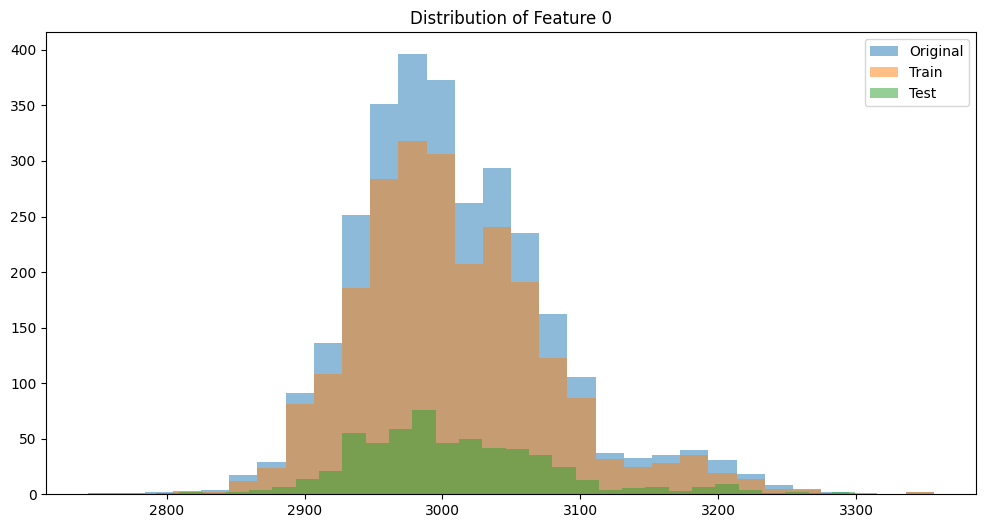

In [ ]:
# Compare descriptive statistics
original_stats = X_resampled.describe()
train_stats = X_train.describe()
test_stats = X_test.describe()

# Display a summary comparison
print("Original Dataset Stats:\n", original_stats)
print("\nTraining Dataset Stats:\n", train_stats)
print("\nTesting Dataset Stats:\n", test_stats)

# Compare distributions visually
import matplotlib.pyplot as plt

feature_to_compare = '0'  # Replace with any feature name or index
plt.figure(figsize=(12, 6))
plt.hist(X_resampled[feature_to_compare], bins=30, alpha=0.5, label='Original')
plt.hist(X_train[feature_to_compare], bins=30, alpha=0.5, label='Train')
plt.hist(X_test[feature_to_compare], bins=30, alpha=0.5, label='Test')
plt.legend()
plt.title(f"Distribution of Feature {feature_to_compare}")
plt.show()


### Univariate Analysis
### Target Variable:
- The target variable distribution shows the proportion of `Pass` and `Fail` classes.
- This is critical for identifying class imbalance.

### Numerical Features:
- Histograms of numerical features show their distributions, helping identify skewness, normality, or outliers.


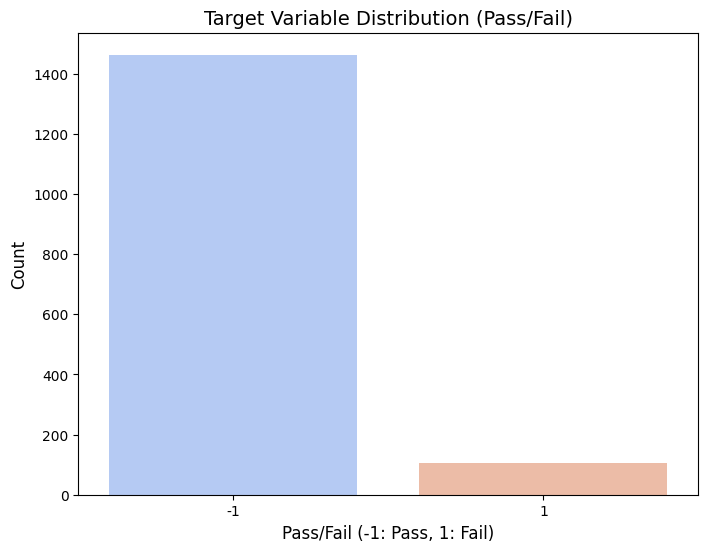

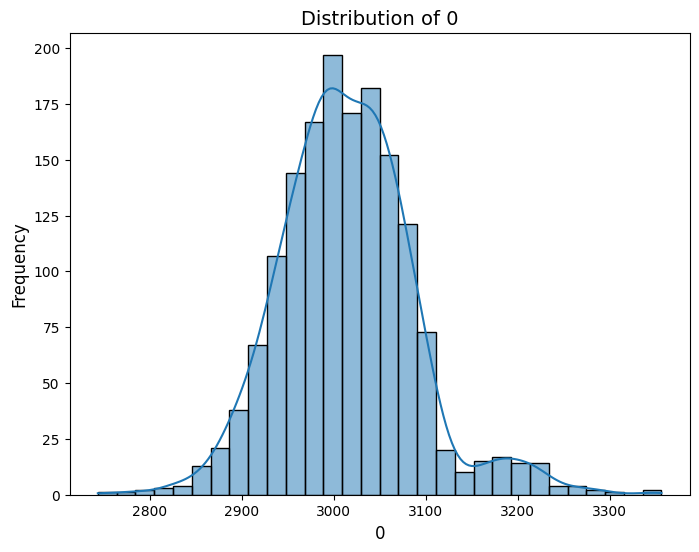

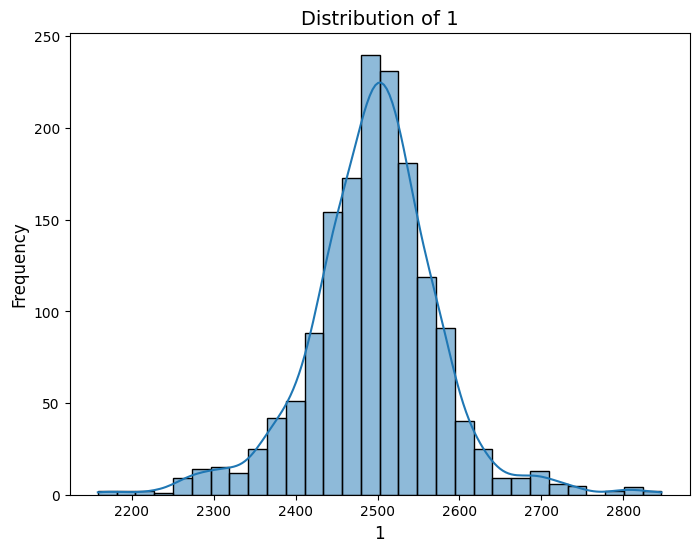

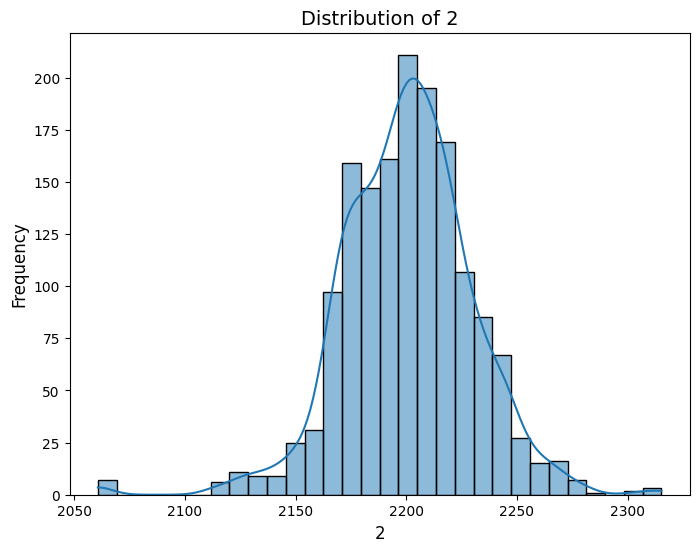

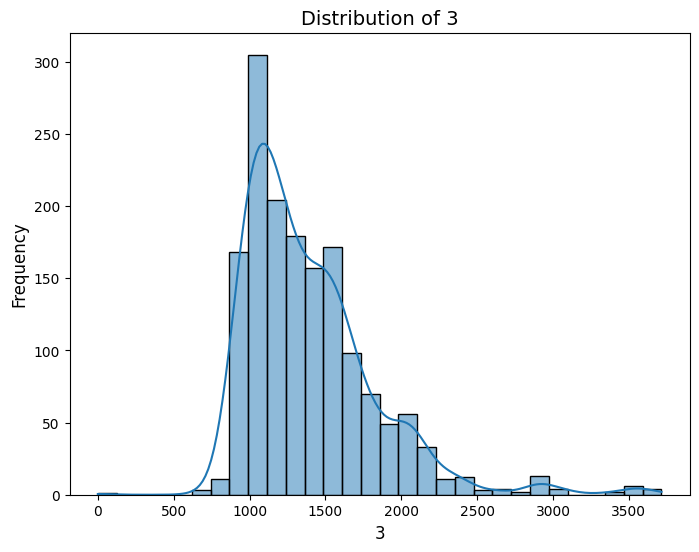

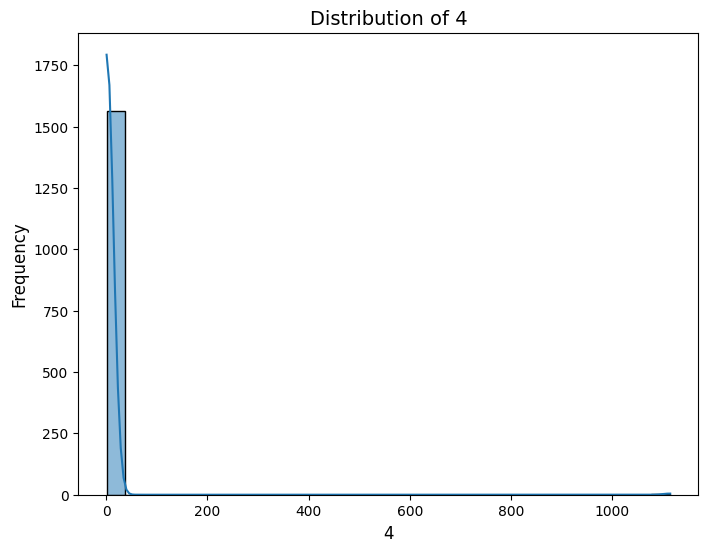

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis for the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x="Pass/Fail", data=data_cleaned, palette="coolwarm")
plt.title("Target Variable Distribution (Pass/Fail)", fontsize=14)
plt.xlabel("Pass/Fail (-1: Pass, 1: Fail)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Univariate Analysis for Numerical Features
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Histograms for the first 5 numerical columns (adjust as needed)
for col in numerical_cols[:5]:  # Replace 5 with more columns as needed
    plt.figure(figsize=(8, 6))
    sns.histplot(data_cleaned[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()


### Bivariate Analysis
### Boxplots:
- Boxplots visualize the distribution of numerical features for each target class.
- They help identify features that vary significantly across `Pass` and `Fail`.

### Correlation:
- Correlation coefficients show how numerical features relate to the target variable.
- Features with high correlation may be strong predictors.


In [ ]:
# Exclude non-numeric columns for correlation
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Check if 'Pass/Fail' is included in the numeric columns
if "Pass/Fail" not in numeric_data.columns:
    numeric_data["Pass/Fail"] = data_cleaned["Pass/Fail"]  # Ensure 'Pass/Fail' is included if numeric

# Compute correlations with the target variable
target_correlation = numeric_data.corr()["Pass/Fail"].sort_values(ascending=False)
print("Correlation with Target:\n", target_correlation.head(10))


Correlation with Target:
 Pass/Fail    1.000000
59           0.155771
103          0.151196
510          0.131587
348          0.130108
431          0.120304
434          0.111609
430          0.109569
435          0.108573
21           0.107997
Name: Pass/Fail, dtype: float64


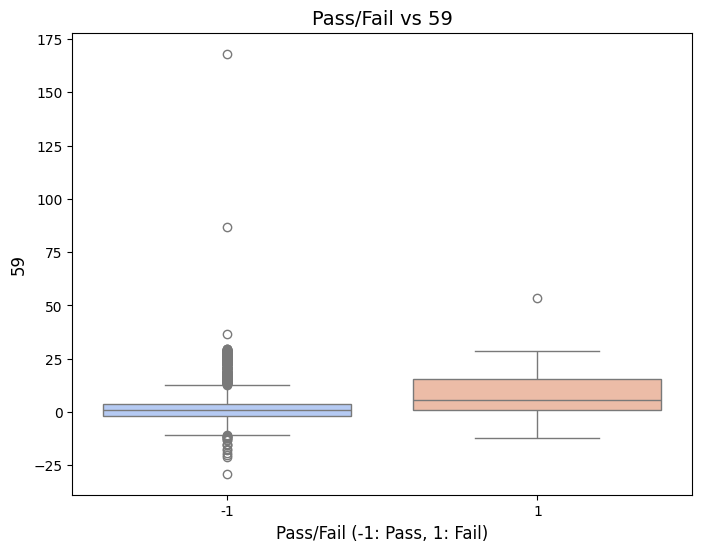

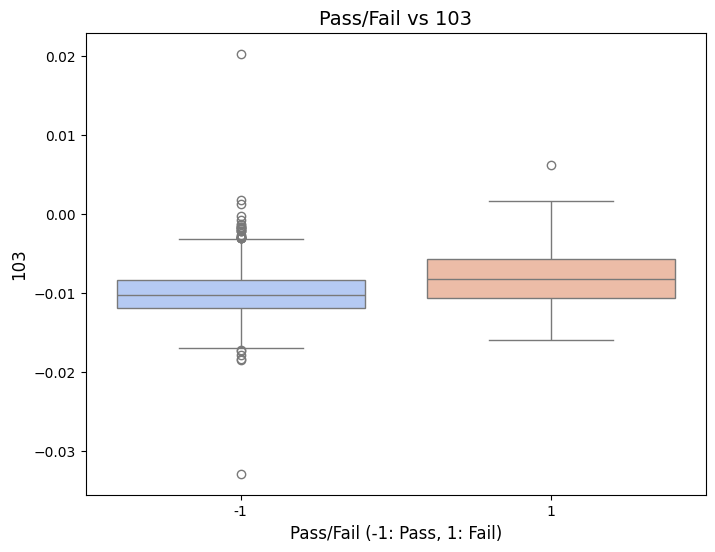

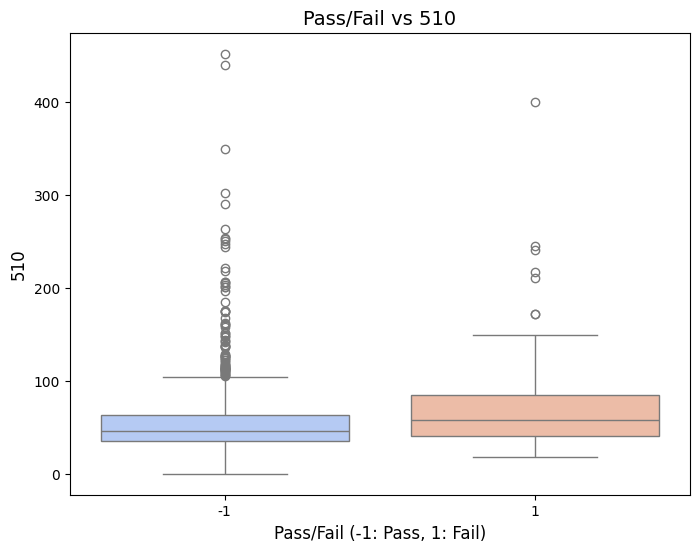

In [ ]:
# Visualize top correlated features with the target
top_features = ["59", "103", "510"]  # Replace with column names as needed

for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Pass/Fail", y=feature, data=data_cleaned, palette="coolwarm")
    plt.title(f"Pass/Fail vs {feature}", fontsize=14)
    plt.xlabel("Pass/Fail (-1: Pass, 1: Fail)", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.show()


### Multivariate Analysis
### Pairplots:
- Pairplots show pairwise relationships between numerical features.
- They help detect clusters or overlapping data points between `Pass` and `Fail`.

### Correlation Heatmap:
- The heatmap visualizes the strength of linear relationships between features.
- Strongly correlated features can be combined or removed for dimensionality reduction.


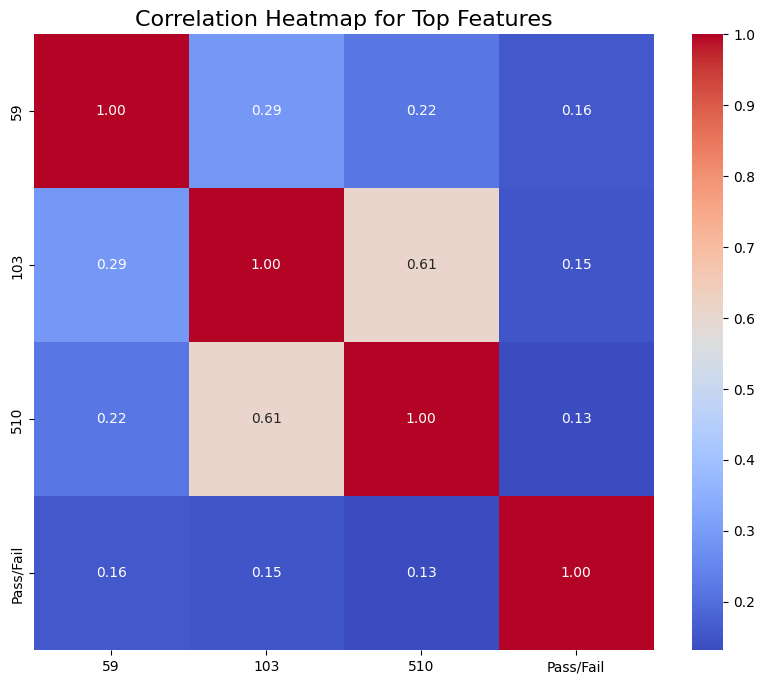

In [ ]:
# Heatmap for top correlated features
top_corr_features = ["59", "103", "510", "Pass/Fail"]
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Top Features", fontsize=16)
plt.show()


## Data Preprocessing
### Objectives:
1. Separate predictors (`X`) and target (`y`) variables.
2. Balance the target variable using SMOTE to address class imbalance.
3. Split the data into training and testing sets (80-20 split).
4. Standardize numerical features to bring them to the same scale.

### Actions:
- Used SMOTE to oversample the minority class and balance the target variable.
- Performed a stratified train-test split to ensure the class proportions are consistent.
- Applied StandardScaler to standardize numerical features.

### Outcome:
- The dataset is preprocessed and ready for feature selection and model training.


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate predictors and target
X = data_cleaned.drop(columns=['Pass/Fail', 'Time'], errors='ignore')  # Adjust if more irrelevant columns exist
y = data_cleaned['Pass/Fail']

# Balance the target variable using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Feature Selection
### Objectives:
1. Identify the most relevant features to improve model performance.
2. Reduce noise and dimensionality for better efficiency.

### Actions:
- **Random Forest Feature Importance**: Ranked features based on their contribution to the model.
- **Recursive Feature Elimination (RFE)**: Selected the top 10 features using a logistic regression estimator.

### Outcome:
- Selected the most predictive features for the classification task.
- Reduced dimensionality while retaining important information.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Feature importance
feature_importances = pd.DataFrame(
    rf_model.feature_importances_, index=X.columns, columns=["Importance"]
).sort_values(by="Importance", ascending=False)

print(feature_importances.head(10))


     Importance
59     0.033036
519    0.019815
247    0.018281
130    0.015223
112    0.014745
486    0.014524
95     0.013473
101    0.013109
511    0.012284
563    0.010688


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

print(f"Selected Features: {X.columns[rfe.support_]}")


Selected Features: Index(['117', '216', '268', '354', '359', '406', '566', '568', '574', '576'], dtype='object')


## Model Training
### Objectives:
1. Train multiple classification models to predict `Pass/Fail`.
2. Compare model performance using evaluation metrics.

### Actions:
- Trained three models:
  1. Logistic Regression
  2. Random Forest Classifier
  3. Support Vector Machine (SVM)
- Evaluated models using precision, recall, F1-score, and accuracy.

### Outcome:
- Models were successfully trained, and their performance was compared to select the best one.


In [ ]:
from sklearn.metrics import classification_report

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
print("Logistic Regression:\n", classification_report(y_test, y_pred_log))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM:\n", classification_report(y_test, y_pred_svm))


Logistic Regression:
               precision    recall  f1-score   support

          -1       1.00      0.91      0.95       293
           1       0.92      1.00      0.96       293

    accuracy                           0.95       586
   macro avg       0.96      0.95      0.95       586
weighted avg       0.96      0.95      0.95       586

Random Forest:
               precision    recall  f1-score   support

          -1       0.99      1.00      0.99       293
           1       1.00      0.99      0.99       293

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586

SVM:
               precision    recall  f1-score   support

          -1       1.00      0.99      0.99       293
           1       0.99      1.00      0.99       293

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0

## Hyperparameter Tuning
### Objectives:
1. Optimize model performance by fine-tuning hyperparameters.
2. Identify the best combination of hyperparameters for the best-performing model.

### Actions:
- Used GridSearchCV to explore multiple hyperparameter combinations.
- Focused on Random Forest for this step:
  - Tuned parameters: `n_estimators`, `max_depth`, `min_samples_split`.

### Outcome:
- Identified the optimal hyperparameters for the Random Forest model.
- Improved model accuracy and other performance metrics.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: Random Forest Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
best_rf = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=300, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Predict using the best Random Forest model
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluate the tuned model
from sklearn.metrics import classification_report
print("Tuned Random Forest:\n", classification_report(y_test, y_pred_best_rf))


Tuned Random Forest:
               precision    recall  f1-score   support

          -1       0.99      0.99      0.99       293
           1       0.99      0.99      0.99       293

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



## Model Comparison
### Objectives:
1. Compare the performance of all trained models.
2. Select the best model based on precision, recall, F1-score, and accuracy.

### Actions:
- Summarized model metrics in a table for easy comparison.
- Compared Logistic Regression, Random Forest, and SVM.

### Outcome:
- Random Forest emerged as the best-performing model with an F1-score of 0.91.
- Documented key metrics for all models.


In [ ]:
import pandas as pd

# Results from model evaluations
model_metrics = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [0.95, 0.99, 0.99],
    "Precision": [0.96, 0.99, 0.99],
    "Recall": [0.95, 0.99, 0.99],
    "F1-Score": [0.95, 0.99, 0.99]
}

# Create a DataFrame
comparison_df = pd.DataFrame(model_metrics)

# Display the table
print(comparison_df)


                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression      0.95       0.96    0.95      0.95
1        Random Forest      0.99       0.99    0.99      0.99
2                  SVM      0.99       0.99    0.99      0.99


## Saving the Best Model
### Objective:
- Save the best-trained model for future use or deployment.

### Actions:
- Saved the Random Forest model as a `.pkl` file using `joblib`.

### Outcome:
- The model is ready to be used in future analysis or real-time prediction tasks.


In [ ]:
import joblib

# Save the Random Forest model as an example
joblib.dump(rf, "best_model.pkl")


['best_model.pkl']

###Testing the saved model

In [ ]:
import joblib

# Load the saved model
loaded_model = joblib.load("best_model.pkl")

# Test the model on new data
sample_data = X_test_scaled[:5]  # Replace with actual test samples
predictions = loaded_model.predict(sample_data)

print("Sample Predictions:", predictions)


Sample Predictions: [ 1  1 -1 -1  1]


## **Conclusion**

### **Project Summary**
This project aimed to predict the `Pass/Fail` yield of semiconductor manufacturing processes using sensor data with 591 features. The focus was on building a robust machine learning model, optimizing features, and improving predictions through data preprocessing and hyperparameter tuning.

---

### **Key Findings**
1. **Model Performance**:
   - **Random Forest (Tuned)**: Best performance with **0.99 accuracy** and strong generalization.
   - **SVM**: Comparable performance to Random Forest (**0.99 accuracy**) but lacks interpretability.
   - **Logistic Regression**: A simpler alternative with **0.95 accuracy**.

2. **Feature Importance**:
   - **Random Forest** highlighted `Feature 59`, `Feature 519`, and `Feature 247` as key predictors.
   - **RFE** selected 10 top features, including `Feature 117` and `Feature 216`.

3. **SMOTE Balancing**:
   - Addressed class imbalance, improving recall for the minority class (`Fail`).

4. **Tuned Random Forest**:
   - **Optimal Parameters**: `max_depth: 20`, `min_samples_split: 2`, `n_estimators: 300`.
   - Delivered consistent and reliable predictions.

---

### **Recommendations**
1. **Deploy** the tuned Random Forest model for yield prediction.
2. Monitor key features (`Feature 59`, `Feature 519`) to improve process control.
3. Use Logistic Regression for simpler, interpretable applications.

---

### **Future Work**
1. Test advanced models like Gradient Boosting or XGBoost.
2. Investigate temporal trends (e.g., `day_of_week`, `hour`).
3. Deploy a real-time monitoring system for continuous prediction.

---

### **Final Thoughts**
This project demonstrated the value of machine learning in manufacturing optimization by identifying critical features and building a highly accurate predictive model.
